Primero inicializamos las librerias que vamos a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

Despues cargamos los archivos que contienen la informacion

In [2]:
df_games = pd.read_csv("/datasets/games.csv")

Desplegamos la informacion del Dataframe para saber la estructura general del mismo

In [3]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


De primera mano apreciamos que las columnas usan una estructura de mayusculas y minusculas, sera mejor hacer un cambio a todo por minusculas para evitar errores de escritura, ademas se aprecian valores nulos en varias columnas, asi como columnas tipo object, que sera mejor cambiar por tipo String para manejarlos de forma mas adecuada

Ahora haremos algunas evaluaciones en las columnas para saber como esta estructurado el data frame, como estan descritos los valores y tratar de identificar si hay valores parcialmente repetidos por errores de escritura o temas similares

In [4]:
df_games.sample(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9664,Charm Girls Club: My Fashion Mall,DS,NaN,Simulation,0.12,0.00,0.00,0.01,NaN,tbd,E
16342,Seisou no Amazones,3DS,2013.0,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
4857,Disney Infinity 3.0,X360,2015.0,Action,0.21,0.15,0.00,0.03,NaN,NaN,NaN
16446,Kenka Banchou Portable,PSP,2009.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
2632,NBA 2K7,PS2,2006.0,Sports,0.65,0.02,0.00,0.11,81.0,8.4,E
2859,Battlefield: Bad Company 2,PC,2010.0,Shooter,0.19,0.53,0.00,0.00,87.0,8.3,M
2070,Road & Track Presents: The Need for Speed,PS,1995.0,Racing,0.56,0.38,0.00,0.07,NaN,NaN,NaN
12967,Doraemon 2: Nobita no Toizurando Daibouken,SNES,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
9567,Rock Band Track Pack Volume 2,PS3,2008.0,Misc,0.11,0.00,0.00,0.01,NaN,tbd,T
12324,Mitsukete! Keroro Gunsou: Machigai Sagashi Dai...,DS,2007.0,Action,0.00,0.00,0.06,0.00,NaN,NaN,NaN


In [5]:
df_games["Name"].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [6]:
df_games["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [7]:
df_games["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [8]:
df_games["Critic_Score"].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [9]:
df_games["User_Score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
df_games["Rating"].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Realizado este paso podemos determinar que:
No existen errores ortograficos que nos esten generando datos parcialmente duplicados en las columnas de nombre, genero y plataforma.
Dentro de los valores de calificacion del usuario hay un valor que es "tbd" que significa que aun no ha sido determinado, esto sugiere uno de los 2 siguiente escenarios:
    El juego tiene poco tiempo de lanzamiento y no ha podido tener una evaluacion del usuario
    El juego no ha sido lanzado aunque ya se tiene finalizado y evaluado por las compañias de videojuegos, haremos un filtro para estos casos para poder apreciar si hay alguna pista de lo que sucede

In [11]:
df_games[df_games["User_Score"] == "tbd"].sample(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3881,Classic Word Games,DS,2009.0,Misc,0.09,0.36,0.00,0.06,NaN,tbd,E
6658,Atari Anthology,XB,2004.0,Misc,0.19,0.05,0.00,0.01,68.0,tbd,E
10485,Family Fun Football,Wii,2009.0,Sports,0.10,0.00,0.00,0.01,NaN,tbd,E
13692,NCIS,PC,2011.0,Adventure,0.01,0.02,0.00,0.01,NaN,tbd,T
7997,Remington Super Slam Hunting: North America,Wii,2010.0,Sports,0.17,0.00,0.00,0.01,NaN,tbd,T
9309,Open Season,DS,2006.0,Platform,0.12,0.00,0.00,0.01,72.0,tbd,E
3523,Jampack Summer 2002,PS2,2002.0,Misc,0.28,0.22,0.00,0.07,NaN,tbd,NaN
8558,Namco Classic Fighter Collection,PS2,2008.0,Fighting,0.08,0.06,0.00,0.02,NaN,tbd,T
5654,Sega Smash Pack,GBA,2002.0,Misc,0.23,0.08,0.00,0.01,60.0,tbd,E
7321,NCAA March Madness 08,X360,2007.0,Sports,0.20,0.00,0.00,0.02,69.0,tbd,E


Comenzamos las correcciones de columnas y tipos

In [12]:
df_games[["Name","Platform","Genre","Rating"]] = df_games[["Name","Platform","Genre","Rating"]].astype("string")

new_columns = []
for column in df_games.columns:
    name_stripped = column.strip()
    name_lowered = name_stripped.lower()
    name_no_spaces = name_lowered.replace(' ', '_')
    new_columns.append(name_no_spaces)
df_games.columns = new_columns

df_games["user_score"] = df_games["user_score"].replace("tbd", np.nan)
df_games["user_score"] = pd.to_numeric(df_games["user_score"], errors='coerce')
df_games["rating"]=df_games["rating"].fillna("RP")
df_games.info()
df_games.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  string 
 1   platform         16715 non-null  string 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  string 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  string 
dtypes: float64(7), string(4)
memory usage: 1.4 MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11222,Rugby 15,XOne,2015.0,Sports,0.03,0.05,0.00,0.01,20.0,3.1,E
174,Pokemon Pinball,GB,1999.0,Misc,3.02,1.12,1.01,0.16,NaN,NaN,RP
13942,Pro Race Driver,XB,2003.0,Racing,0.03,0.01,0.00,0.00,80.0,7.5,T
11095,Mystic Heroes,GC,2002.0,Action,0.03,0.01,0.04,0.00,67.0,8.5,T
16601,The Land Before Time: Into the Mysterious Beyond,GBA,2006.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,RP
3238,The Princess and the Frog,DS,2009.0,Platform,0.41,0.16,0.00,0.05,NaN,NaN,E
632,Final Fantasy V,SNES,1992.0,Role-Playing,0.00,0.00,2.43,0.02,NaN,NaN,RP
16240,IL-2 Sturmovik,PC,2001.0,Simulation,0.00,0.01,0.00,0.00,91.0,8.8,T
8459,Parodius,SAT,1995.0,Shooter,0.00,0.00,0.16,0.00,NaN,NaN,RP
5430,Pirates of the Caribbean: At World's End,X360,2007.0,Action,0.29,0.02,0.00,0.03,58.0,5.3,T


Antes de continuar debemos detectar porque existen valores repetidos en la columna de nombre

In [13]:
df_games[df_games["name"].duplicated()].sort_values(by="name")


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3862,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,RP
9507,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,NaN,T
4475,007: Quantum of Solace,PS2,2008.0,Action,0.17,0.00,0.00,0.26,NaN,NaN,RP
1785,007: Quantum of Solace,PS3,2008.0,Action,0.43,0.51,0.02,0.19,65.0,6.6,T
3120,007: Quantum of Solace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
...,...,...,...,...,...,...,...,...,...,...,...
3304,pro evolution soccer 2011,X360,2010.0,Sports,0.09,0.44,0.00,0.07,79.0,5.9,E
4664,pro evolution soccer 2011,PS2,2010.0,Sports,0.04,0.21,0.05,0.11,NaN,6.7,E
2583,pro evolution soccer 2011,PSP,2010.0,Sports,0.05,0.30,0.29,0.16,74.0,5.8,E
15612,uDraw Studio: Instant Artist,X360,2011.0,Misc,0.01,0.01,0.00,0.00,54.0,5.7,E


In [14]:
df_games[df_games["name"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,<NA>,GEN,1993.0,<NA>,1.78,0.53,0.00,0.08,NaN,NaN,RP
14244,<NA>,GEN,1993.0,<NA>,0.00,0.00,0.03,0.00,NaN,NaN,RP


Ya realizados los filtros y cambios en la informacion se determina lo siguiente:

Los nombres de las columnas se cambiaron a minusculas y se elimina todo rastro de espacios no deseados para asegurar correcto manejo de la informacion

Se borraron los datos nulos de la columna Rating ya que a pesar de ser un valor nulo, existe una categorizacion que es RP la cual representa a aquellos juegos que aun no tienen un ratin RP = Rating Pending, el cual es mas adecuado para esta columna

En cuanto a los valores nulos de critic_score y user_score, opte por seguir dejando los valores vacios ya que colocar cualquier otra referencia numerica genera informacion falta acerca del juego y puede significar cambios importantes en la informacion estadistica.

Los valores nulos dentro de la columna de nombre puede simplemente ser omision de informacion al momento de hacer los registros, los valores nulos dentro de las columnas de critic_score y users_score puede deberse a la poca popularidad de los juegos y la poca motivacion tanto de jugadores como de criticos para emitir un veredicto, esto se podria respaldar en que como tal no existe ningun registro de evaluaciones del juego en si y la ausencia de un rating puede deberse a factores como que el juego aun no se ha lanzado o tiene poco de haber sido lanzado, lo que implicaria que no ha terminado de hacerse un analisis completo de la estructura del mismo para determinar un rating publico.

Existen varios juegos que a pesar de tener el mismo nombre, estan presentes en diferentes plataformas, lo que genera valores repetidos parciales que no podemos eliminar de la lista ya que aunque el nombre sea el mismo, la informacion de ventas, consumo y clasificacion no es la misma para todas las plataformas

Ademas de esto existen 2 registros que aunque tienen valores de ventas en algunas regiones, estos renglones pueden ser manejados de 2 maneras
    1.- Eliminarlos ya que la informacion que presentan no esta completa y puede llegar a generar errores en el analisis
    2.- Manejarlos solo bajo contextos especificos donde la poca informacion que contienen pueda ser de utilidad.
    
        En este caso optaremos por descartar estas filas ya que son unicamente 2 dentro de un campo de mas de 16 mil, por lo que lo que aportan numericamente a las estadisticas puede considerarse despreciable ya que no hara cambios significativos en los resultados finales
    


In [15]:
df_games = df_games.dropna(subset=["name"])
df_games[df_games["name"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Calcularemos ahora el valor total de ventas de cada uno de los juegos

In [16]:
df_games["total_sales"] = df_games["na_sales"] + df_games["eu_sales"] + df_games["jp_sales"] + df_games["other_sales"]

df_games.sample(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16487,Command & Conquer Renegade,PC,2002.0,Shooter,0.00,0.01,0.00,0.00,NaN,NaN,RP,0.01
13591,White Album 2: Shiawase no Mukougawa,PS3,2012.0,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,RP,0.04
7719,The Naked Brothers Band: The Video Game,DS,2008.0,Misc,0.18,0.00,0.00,0.01,NaN,NaN,RP,0.19
14634,Blue Breaker: Ken Yorimo Hohoemi o,PCFX,1996.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,RP,0.03
5244,Shrek,XB,2001.0,Platform,0.25,0.10,0.00,0.01,49.0,5.4,T,0.36
6430,The Incredible Hulk,X360,2008.0,Action,0.22,0.02,0.00,0.02,55.0,6.4,T,0.26
12121,Fighter Maker 2,PS2,2002.0,Fighting,0.03,0.03,0.00,0.01,58.0,7.8,T,0.07
13618,Strike Force Bowling,XB,2004.0,Sports,0.03,0.01,0.00,0.00,54.0,NaN,E,0.04
5030,Ice Age: Dawn of the Dinosaurs,DS,2009.0,Action,0.20,0.15,0.00,0.04,54.0,NaN,E,0.39
7915,Tom Clancy's Splinter Cell: Blacklist,PC,2013.0,Action,0.04,0.13,0.00,0.01,82.0,7.4,M,0.18


Calculamos el numero de juegos que fueron lanzados por año

In [18]:
juegos_por_año = df_games.groupby("year_of_release")["name"].count()
print(juegos_por_año)

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64


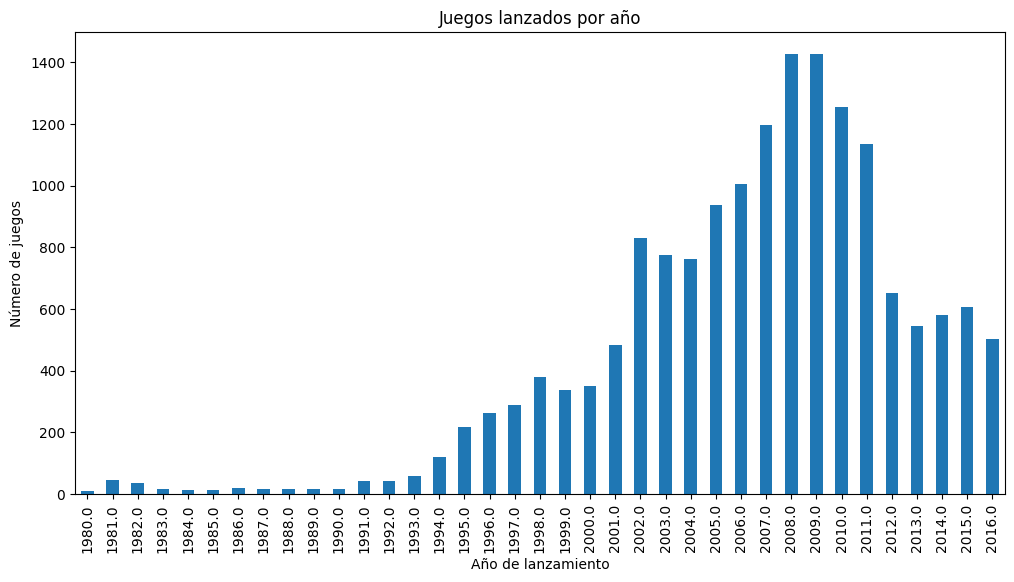

In [19]:
juegos_por_año.plot(kind="bar", figsize=(12, 6), title="Juegos lanzados por año")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Número de juegos")
plt.show()

Podemos apreciar que los años con mas lanzamientos de videojuegos fueron el 2008 y el 2009 con mas de 1400 juegos lanzados para todas las plataformas

Ahora haremos lo mismo pero clasificaremos por plataforma

In [20]:
juegos_por_plataforma = df_games.groupby("platform")["name"].count()
print(juegos_por_plataforma.sort_values(ascending=False))

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: name, dtype: int64


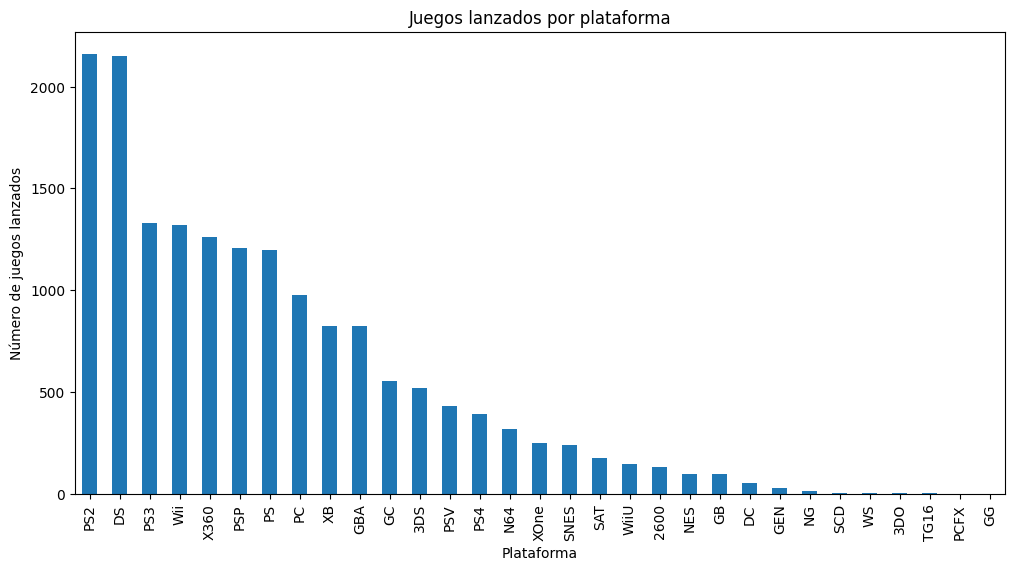

In [21]:
juegos_por_plataforma.sort_values(ascending=False).plot(kind="bar", figsize=(12, 6), title="Juegos lanzados por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Número de juegos lanzados")
plt.show()

Las plataformas para las que se lanzaron mas juegos son la PS2 y la DS con gran diferencia sobre las demas, esto nos hace saber que fueron las mas exitosas hasta el momento

ahora determinaremos el numero de ventas de estos juegos por plataforma

In [22]:
ventas_por_plataforma = df_games.groupby("platform")["total_sales"].sum()
print(ventas_por_plataforma.sort_values(ascending=False))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


Determinamos cuales son las consolas con mas ventas de todas

In [23]:
mas_ventas = ventas_por_plataforma.sort_values(ascending=False).head(10)
mas_ventas

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

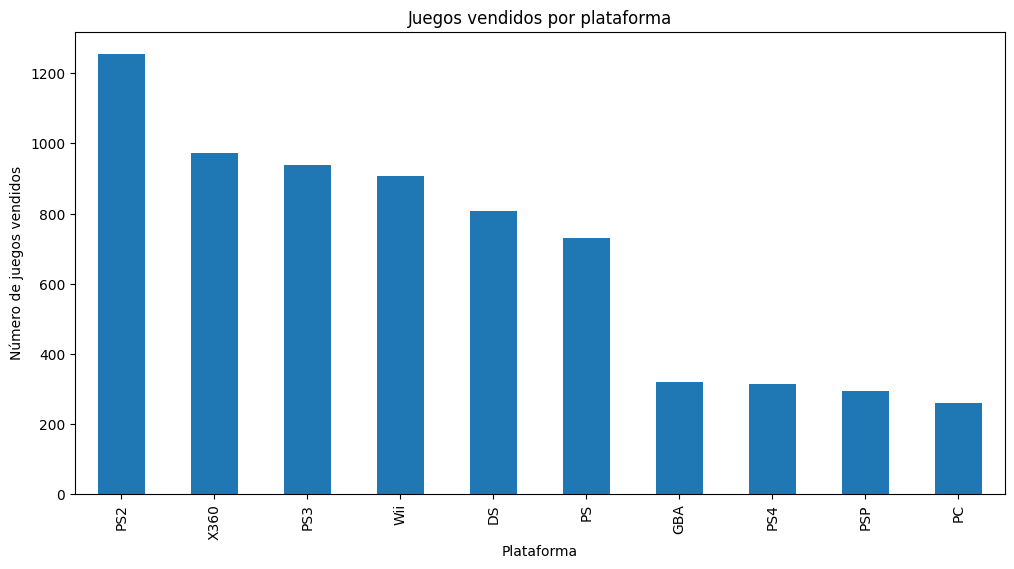

In [24]:
mas_ventas.plot(kind="bar", figsize=(12, 6), title="Juegos vendidos por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Número de juegos vendidos")
plt.show()

La plataforma PS2 se mantuvo a la cabeza tambien con el mayor numero de juegos vendidos pero en esta ocasion la DS fue desplazada, a pesar de haber lanzado un mayor numero de juegos que las demas plataformas, las ventas no fueron tan exitosas y se vio superado por X360, PS3 y la Wii.

Esto puede indicar que los juegos no cumplian la expectativa de los jugadores y no lograba captar la atencion lo suficiente para concretar la compra, mientras que los juegos de X360 aunque fueron menos, pueden ser de mayor calidad para los jugadores

Determinamos los periodos de vida de las consolas usando su primer año en mercado, el ultimo y el conteo de años vigentes

In [25]:
ventas_anuales = df_games.groupby(["platform", "year_of_release"])["total_sales"].sum().reset_index()

vida_util = ventas_anuales.groupby("platform")["year_of_release"].agg(["min", "max", "count"]).sort_values(by="max", ascending=False)

vida_util = vida_util.rename(columns={"min": "primer_año","max":"ultimo_año","count":"años_con_ventas"})
print(vida_util.sort_values("años_con_ventas", ascending = False))


          primer_año  ultimo_año  años_con_ventas
platform                                         
PC            1985.0      2016.0               26
GB            1988.0      2001.0               13
X360          2005.0      2016.0               12
NES           1983.0      1994.0               12
PSP           2004.0      2015.0               12
PS2           2000.0      2011.0               12
Wii           2006.0      2016.0               11
PS3           2006.0      2016.0               11
DS            1985.0      2013.0               11
2600          1980.0      1989.0               10
PS            1994.0      2003.0               10
SNES          1990.0      1999.0               10
XB            2000.0      2008.0                9
GBA           2000.0      2007.0                8
N64           1996.0      2002.0                7
GC            2001.0      2007.0                7
DC            1998.0      2008.0                7
3DS           2011.0      2016.0                6


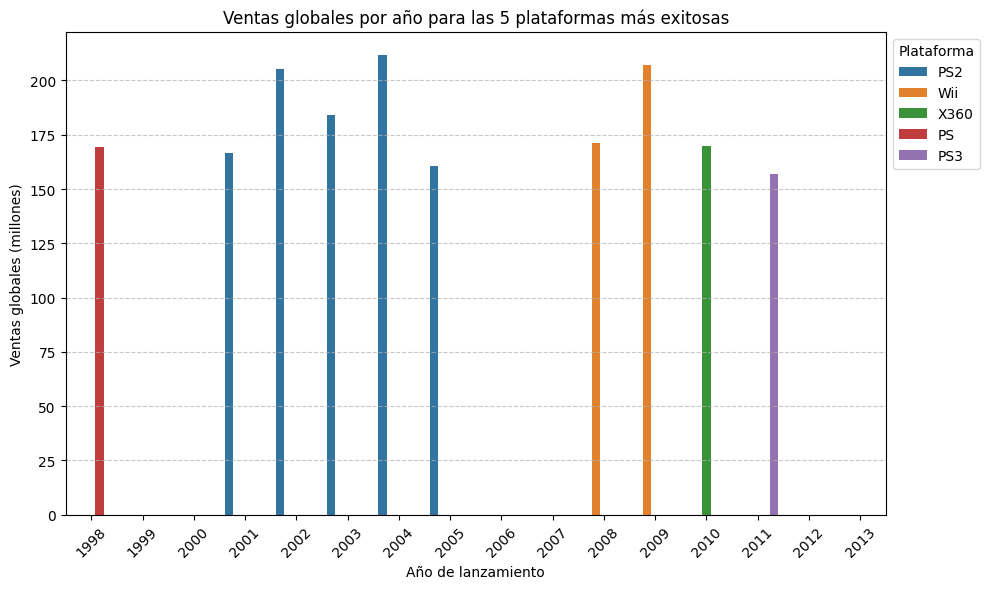

In [26]:
ventas_anuales
top_ventas_anuales = ventas_anuales.sort_values("total_sales",ascending=False).head(10)
top_ventas_anuales

plt.figure(figsize=(10, 6))
sns.barplot(data=top_ventas_anuales, x="year_of_release", y="total_sales", hue="platform",order=list(range(1998, 2014)))

plt.title("Ventas globales por año para las 5 plataformas más exitosas")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas globales (millones)")
plt.legend(title="Plataforma", bbox_to_anchor=(1, 1), loc="upper left")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [27]:
vida_util = vida_util.reset_index()
vida_util["periodo_de_vida"] = vida_util["ultimo_año"] - vida_util["primer_año"] + 1
print(vida_util.sort_values(by="periodo_de_vida", ascending=False))

   platform  primer_año  ultimo_año  años_con_ventas  periodo_de_vida
6        PC      1985.0      2016.0               26             32.0
10       DS      1985.0      2013.0               11             29.0
19       GB      1988.0      2001.0               13             14.0
2      X360      2005.0      2016.0               12             12.0
26      NES      1983.0      1994.0               12             12.0
9       PSP      2004.0      2015.0               12             12.0
11      PS2      2000.0      2011.0               12             12.0
4       Wii      2006.0      2016.0               11             11.0
8       PS3      2006.0      2016.0               11             11.0
12       DC      1998.0      2008.0                7             11.0
30     2600      1980.0      1989.0               10             10.0
16       PS      1994.0      2003.0               10             10.0
21     SNES      1990.0      1999.0               10             10.0
13       XB      200

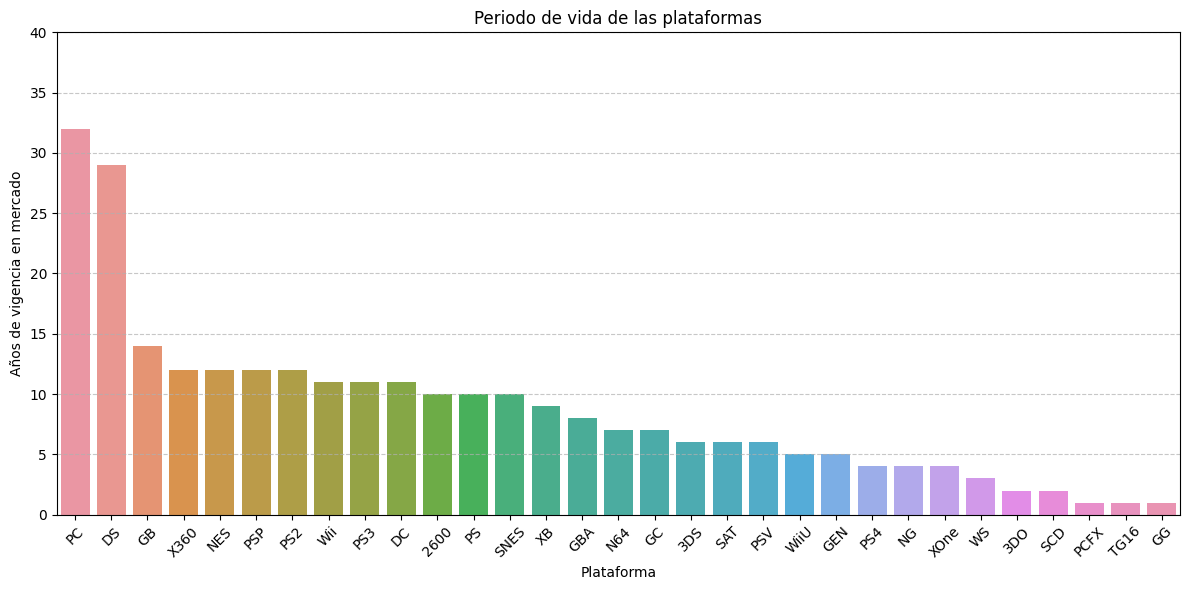

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=vida_util.sort_values(by="periodo_de_vida", ascending=False), x="platform", y="periodo_de_vida")

plt.title("Periodo de vida de las plataformas")
plt.xlabel("Plataforma")
plt.ylabel("Años de vigencia en mercado")
plt.xticks(rotation=45)
plt.ylim(0, 40)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Vamos a construir un modelo para el 2017, consideraremos las estadisticas de los años 2012 a 2016 como base para hacerlo ya que hay una renovacion constante de plataformas

In [29]:
df_actual = df_games[df_games["year_of_release"].between(2011, 2016)]
df_actual["platform"].unique()

<StringArray>
[ 'PS3', 'X360',  'PS4',  '3DS',  'Wii',   'DS', 'XOne', 'WiiU',   'PC',
  'PSV',  'PSP',  'PS2']
Length: 12, dtype: string

Dentro de este periodo de tiempo han estado activas 12 plataformas y dentro de ellas se encuentran las consolas que mas lanzamientos y mas ventas de juegos han tenido, por lo tanto es un periodo aceptable de tiempo para conocer como se comportaria el año 2017

In [30]:
ventas_por_plataforma = df_actual.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
print(ventas_por_plataforma.head(12))

platform
PS3     445.57
X360    380.38
PS4     314.14
3DS     257.81
XOne    159.32
PC       97.68
Wii      95.02
WiiU     82.19
PSV      53.81
DS       38.73
PSP      29.01
PS2       0.45
Name: total_sales, dtype: float64


Contrario a lo que se presento en los años anteriores, aqui la PS2 comienza a decaer teniendo el peor registro de ventas de todas las consolas existentes, viendose superada por su sucesora la PS3, algo similar ocurre con la DS que ahora se ve opacada por la 3DS, indicando que el lanzamiento de una nueva plataforma sucesora de las anteriores, es el inicio de la decadencia

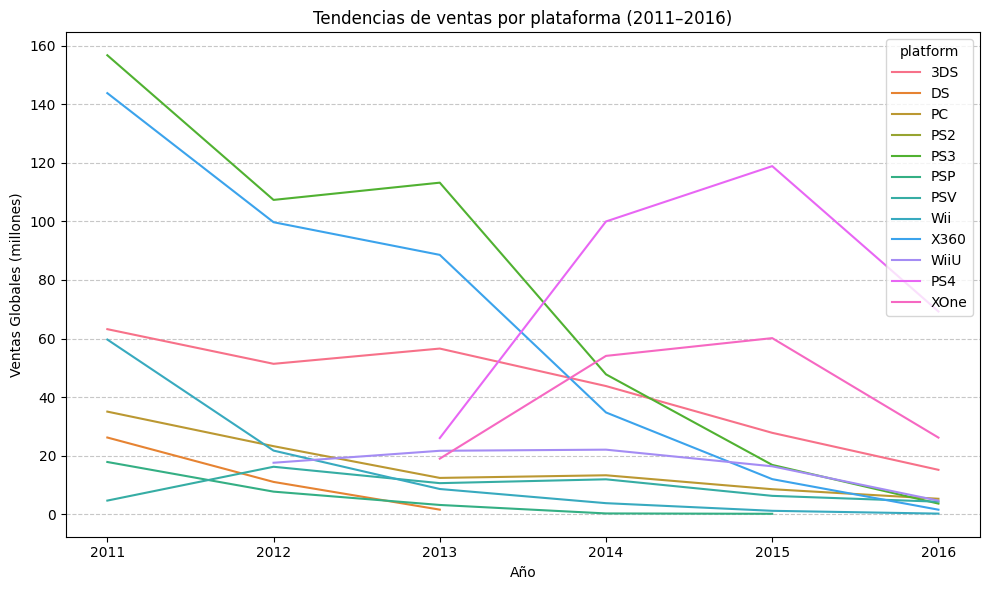

In [31]:
ventas_anuales = df_actual.groupby(["year_of_release", "platform"])["total_sales"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=ventas_anuales, x="year_of_release", y="total_sales", hue="platform")
plt.title("Tendencias de ventas por plataforma (2011–2016)")
plt.xlabel("Año")
plt.ylabel("Ventas Globales (millones)")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [32]:
ventas_2016 = df_games[df_games["year_of_release"] == 2016].groupby("platform")["total_sales"].sum().sort_values(ascending=False)
print(ventas_2016)

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64


El escenario para 2017 apunta favorable para la PS4, XOne y 3DS quienes son los lideres en ventas para el 2016, ademas de que directamente provocan la caida de ventas en sus antecesoras PS3, XOne, DS y Wii, dejando con pocas ventas a estas plataformas e incluso dejando totalmente fuera del escenario a la DS que detuvo las ventas en 2013.

Las plataformas que apuntan a tener un buen 2017 comparadas con las demas serian la PS4, XOne, y 3DS al ser las mas nuevas y que cuentan con mejor tecnologia y las que reducen de forma realmente notoria sus ventas son las antecesoras PS3, X360 y Wii, quienes son totalmente reemplazadas quedando en los ultimos lugares de ventas de las consolas aun vigentes.

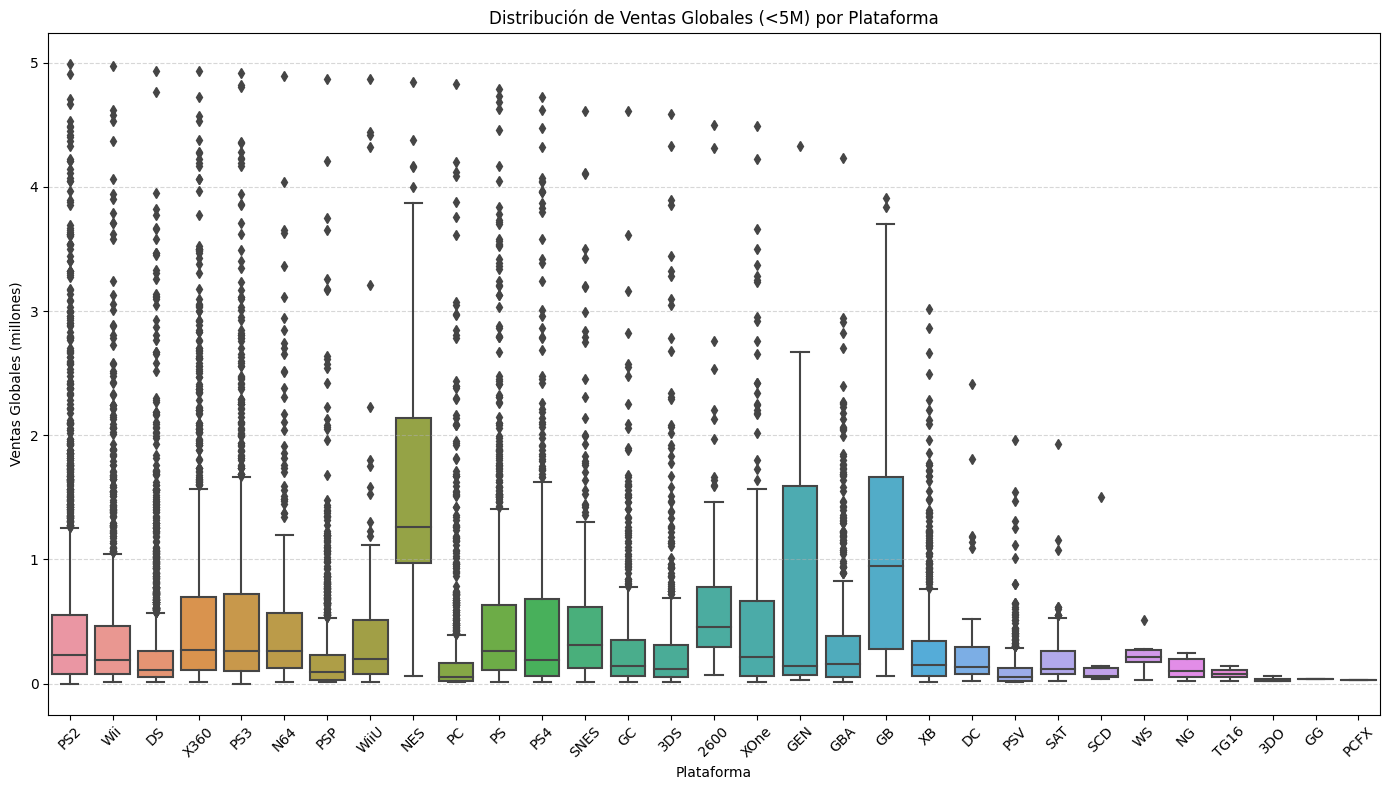

In [33]:
df_filtrado = df_games[df_games["total_sales"] < 5]

plt.figure(figsize=(14, 8))
sns.boxplot(
    data=df_filtrado,
    x="platform",
    y="total_sales"
)
plt.title("Distribución de Ventas Globales (<5M) por Plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Ventas Globales (millones)")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Se aprecia que la mayoria de consolas tiene una carga notoria de valores atipicos superiores en el diagrama y para la mayoria de los casos tenemos un sesgo hacia la derecha, lo que nos indica que la mayoria de los juegos tienen ventas bajas a moderadas, siendo un poco numero los que representan ventas altas, ademas tenemos un numero increible de puntos fuera de los diagramas que nos indican unos cuantos juegos estan generando la mayoria de ventas de las plataformas, esto quiere decir lo siguiente

1.- Los juegos Best Sellers son la principal fuente de vida de las plataformas ya que con unos pocos juegos logran generar la mayoria de ventas de la plataforma haciendo que los demas juegos queden en un segundo plano en cuanto a ventas, claro que aportan al desarrollo del analisis y no pueden desecharse ni siquiera los juegos que menos ventas tienen, pero es de prestar atencion en el tipo de juegos que generan estos numeros altos ya que son los que buscaremos replicar en un futuro

2.- El mundo de los videojuegos es muy volatil, ya que al existir un numero reducido de juegos que pueden determinar el exito de una plataforma, tambien pueden significar el fracaso total de la misma si no logran introducirse en el catalogo de gustos del consumidor.

3.- El un mundo de alto riesgo porque la mayoria de juegos puede tener un nivel de ventas medio/bajo, pero si un juego es del agrado del publico puede superar por mucho a todos los demas juegos, es importante encontrar estos patrones que permiten lanzar juegos exitosos


Dentro de todas las plataformas podemos destacar 3, la GEN, la GB y la NES que fueron las que tuvieron la menor cantidad de valores atipicos pero tuvieron un promedio de ventas mucho mayor en todos sus demas juegos, convirtiendose en las mas estables de todas, pero viendose obsoletas por los cambios de tecnologia y la aparicion de nuevas plataformas


Evaluaremos la influencia de las reseñas de los profesionales y usuarios de la DS para conocer que tanto pueden llegar a afectar las ventas

In [34]:
df_ds = df_games[df_games["platform"]=="DS"]
df_ds = df_ds[~(df_ds["user_score"].isna() & df_ds["critic_score"].isna())]
df_ds

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
11,Mario Kart DS,DS,2005.0,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,4.74,9.20,4.16,2.04,77.0,7.9,E,20.14
26,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,3.43,5.35,5.32,1.18,77.0,7.1,E,15.28
43,Animal Crossing: Wild World,DS,2005.0,Simulation,2.50,3.45,5.33,0.86,86.0,8.7,E,12.14
...,...,...,...,...,...,...,...,...,...,...,...,...
16457,Monster Bomber,DS,2006.0,Puzzle,0.01,0.00,0.00,0.00,55.0,NaN,E,0.01
16469,Fullmetal Alchemist: Trading Card Game,DS,2007.0,Misc,0.01,0.00,0.00,0.00,61.0,7.5,T,0.01
16493,The Wild West,DS,2007.0,Action,0.01,0.00,0.00,0.00,35.0,NaN,E10+,0.01
16529,Hoshigami: Ruining Blue Earth Remix,DS,2007.0,Role-Playing,0.00,0.00,0.01,0.00,55.0,7.9,T,0.01


hicimos un filtrado de los juegos que pertenecen a la plataforma DS y ademas eliminamos todos aquellos que no tienen ni calificacion de criticos ni de usuarios ya que no tendrian ninguna participacion, y vamos a generar una tabla de dispersion que nos ayude a entender que relacion puede existir entre las ventas y las calificaciones de usuarios y criticos

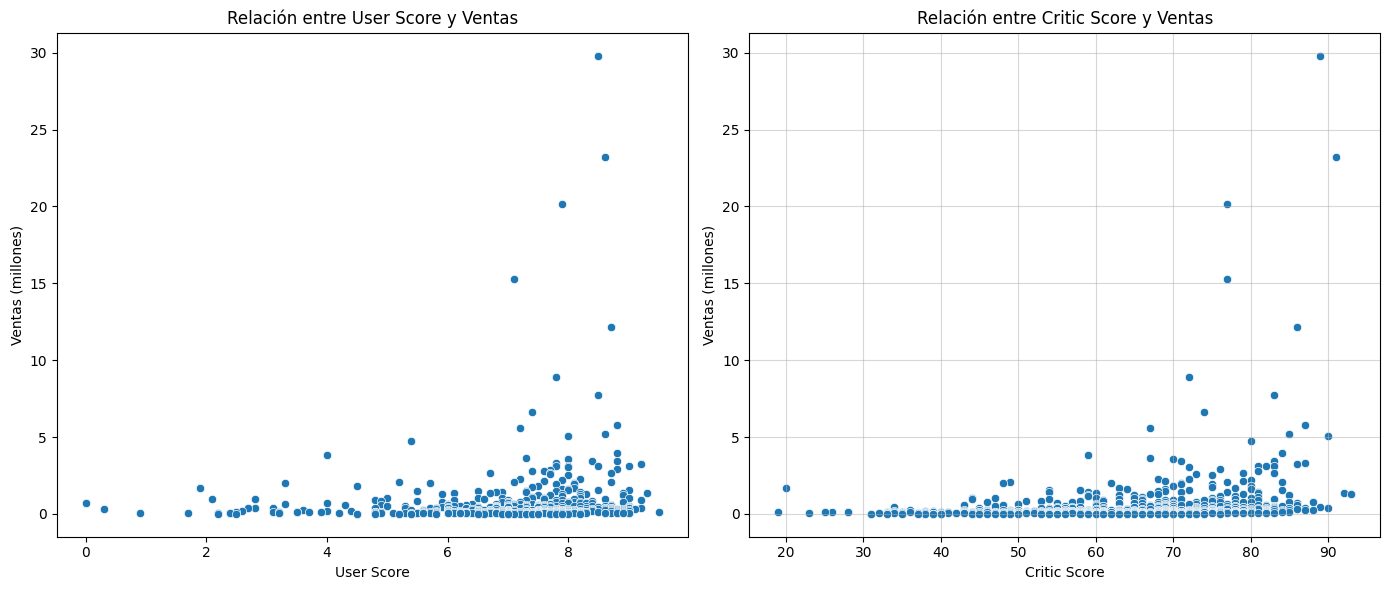

In [35]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_ds, x="user_score", y="total_sales")
plt.title("Relación entre User Score y Ventas")
plt.xlabel("User Score")
plt.ylabel("Ventas (millones)")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_ds, x="critic_score", y="total_sales")
plt.title("Relación entre Critic Score y Ventas")
plt.xlabel("Critic Score")
plt.ylabel("Ventas (millones)")

plt.tight_layout()
plt.grid(True, alpha=0.5)
plt.show()

En ambos casos una buena calificacion esta directamente relacionada con el nivel de ventas elevado, haciendo mas probable que se venda un juego con buena calificacion, pero en esta comparativa podemos apreciar que los juegos con un User Score bajo tienen a generar menos ventas, mientras que si tienen un critic score bajo eaun asi genera ventas, esto puede deberse a que los usuarios dan mas importancia a los comentarios de otros usuarios que ya han probado el juego para tomar la decision de comprarlo, mientras que la calificacion de los criticos no siempre se alinea con los gustos del consumidor

Vamos a analizar las ventas de un juego para diferentes plataformas y saber cual es el comportamiento, para esto haremos un filtrado y consideraremos los juegos que representan un mayor volumen de ventas 

In [36]:
df_multiplataforma = df_games.groupby(["name","platform"])["total_sales"].sum().reset_index()
df_multiplataforma = df_multiplataforma.groupby("name").filter(lambda x: len(x) > 1)
df_multiplataforma.sort_values(["total_sales"], ascending=False).head(10)

,name,platform,total_sales
13465,Super Mario Bros.,NES,40.24
13979,Tetris,GB,30.26
5309,Grand Theft Auto V,PS3,21.05
5319,Grand Theft Auto: San Andreas,PS2,20.81
13481,Super Mario World,SNES,20.62
13468,Super Mario Bros. 3,NES,17.28
5311,Grand Theft Auto V,X360,16.27
5323,Grand Theft Auto: Vice City,PS2,16.15
1862,Call of Duty: Modern Warfare 3,X360,14.73
1837,Call of Duty: Black Ops 3,PS4,14.63


Filtramos primero usando el nombre y la plataforma y despues condicionamos para que nos muestre solo los nombres de los juegos que aparecen mas de una vez, lo que indica que aparece en mas de una plataforma, despues hicimos un filtro por el nivel de ventas totales para saber que juegos son los mejores entre los multiplataforma, ahora graficaremos para tratar de entender el comportamiento 

In [37]:
df_mario_bros = df_multiplataforma[df_multiplataforma["name"] == "Super Mario Bros."]
df_mario_bros

,name,platform,total_sales
13464,Super Mario Bros.,GB,5.07
13465,Super Mario Bros.,NES,40.24


In [38]:
df_tetris = df_multiplataforma[df_multiplataforma["name"] == "Tetris"]
df_tetris

,name,platform,total_sales
13979,Tetris,GB,30.26
13980,Tetris,NES,5.58


In [39]:
df_gtav = df_multiplataforma[df_multiplataforma["name"] == "Grand Theft Auto V"]
df_gtav

,name,platform,total_sales
5308,Grand Theft Auto V,PC,1.17
5309,Grand Theft Auto V,PS3,21.05
5310,Grand Theft Auto V,PS4,12.62
5311,Grand Theft Auto V,X360,16.27
5312,Grand Theft Auto V,XOne,5.47


In [40]:
df_gta = df_multiplataforma[df_multiplataforma["name"] == "Grand Theft Auto: San Andreas"]
df_gta

,name,platform,total_sales
5318,Grand Theft Auto: San Andreas,PC,0.97
5319,Grand Theft Auto: San Andreas,PS2,20.81
5320,Grand Theft Auto: San Andreas,X360,0.11
5321,Grand Theft Auto: San Andreas,XB,1.96


In [41]:
df_mario_world = df_multiplataforma[df_multiplataforma["name"] == "Super Mario World"]
df_mario_world

,name,platform,total_sales
13480,Super Mario World,GBA,5.47
13481,Super Mario World,SNES,20.62


In [42]:
df_multi_combinado = pd.concat([df_mario_bros, df_tetris, df_gtav, df_gta, df_mario_world], ignore_index=True)
df_multi_combinado

,name,platform,total_sales
0,Super Mario Bros.,GB,5.07
1,Super Mario Bros.,NES,40.24
2,Tetris,GB,30.26
3,Tetris,NES,5.58
4,Grand Theft Auto V,PC,1.17
5,Grand Theft Auto V,PS3,21.05
6,Grand Theft Auto V,PS4,12.62
7,Grand Theft Auto V,X360,16.27
8,Grand Theft Auto V,XOne,5.47
9,Grand Theft Auto: San Andreas,PC,0.97


In [43]:
df_multi_combinado.sort_values("total_sales",ascending=False)

,name,platform,total_sales
1,Super Mario Bros.,NES,40.24
2,Tetris,GB,30.26
5,Grand Theft Auto V,PS3,21.05
10,Grand Theft Auto: San Andreas,PS2,20.81
14,Super Mario World,SNES,20.62
7,Grand Theft Auto V,X360,16.27
6,Grand Theft Auto V,PS4,12.62
3,Tetris,NES,5.58
13,Super Mario World,GBA,5.47
8,Grand Theft Auto V,XOne,5.47


In [44]:
df_multi_total = df_multi_combinado.groupby("name")["total_sales"].sum().reset_index()
df_multi_total.sort_values("total_sales",ascending=False)

,name,total_sales
0,Grand Theft Auto V,56.58
2,Super Mario Bros.,45.31
4,Tetris,35.84
3,Super Mario World,26.09
1,Grand Theft Auto: San Andreas,23.85


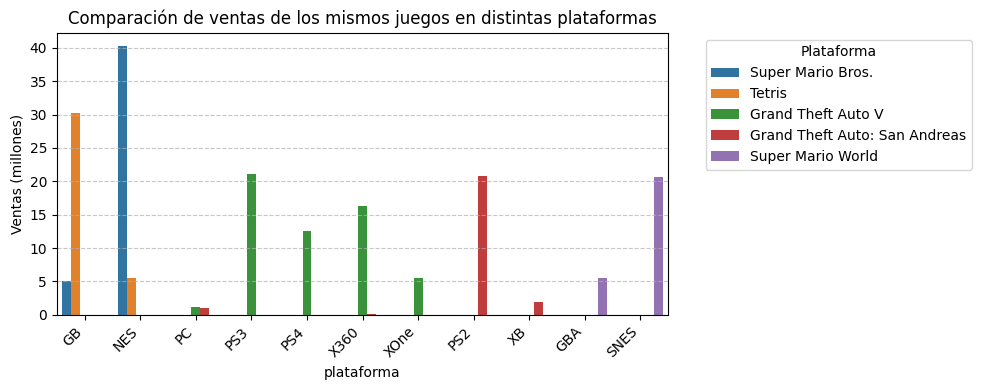

In [45]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df_multi_combinado, x="platform", y="total_sales", hue="name")
plt.xticks(rotation=45, ha="right")
plt.title("Comparación de ventas de los mismos juegos en distintas plataformas")
plt.ylabel("Ventas (millones)")
plt.xlabel("plataforma")
plt.legend(title="Plataforma", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

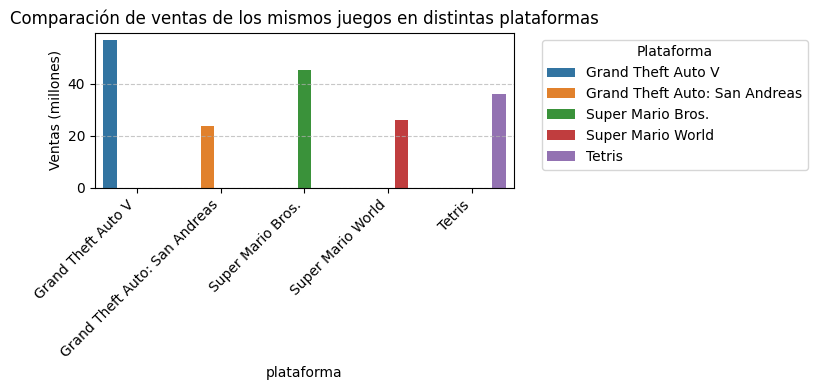

In [46]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df_multi_total, x="name", y="total_sales", hue="name")
plt.xticks(rotation=45, ha="right")
plt.title("Comparación de ventas de los mismos juegos en distintas plataformas")
plt.ylabel("Ventas (millones)")
plt.xlabel("plataforma")
plt.legend(title="Plataforma", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

Este comportamiento nos demuestra lo importante que es poder lanzar un juego en varias plataformas ya que aunque el juego multiplataforma mas vendido de todos es el Super Mario Bros para NES, al considerar las ventas que se hacen dentro de todas las plataformas, Grand Theft Auto V es el claro ganador, aunque de manera individual por plataforma tenga un nivel de ventas menor.


Veamos que sucede con el comportamiento segun el genero

In [47]:
df_genre = df_games.groupby(["genre"])["total_sales"].sum().reset_index()
df_genre_games = df_games.groupby(["genre"])["name"].count().reset_index()

df_genre_comb = pd.merge(df_genre, df_genre_games, on="genre")
df_genre_comb = df_genre_comb.rename(columns={"name": "games_number"})
df_genre_comb.sort_values("total_sales", ascending=False)

,genre,total_sales,games_number
0,Action,1744.17,3369
10,Sports,1331.27,2348
8,Shooter,1052.45,1323
7,Role-Playing,934.56,1498
4,Platform,827.77,888
3,Misc,802.51,1750
6,Racing,728.67,1249
2,Fighting,447.53,849
9,Simulation,389.97,873
5,Puzzle,242.57,580


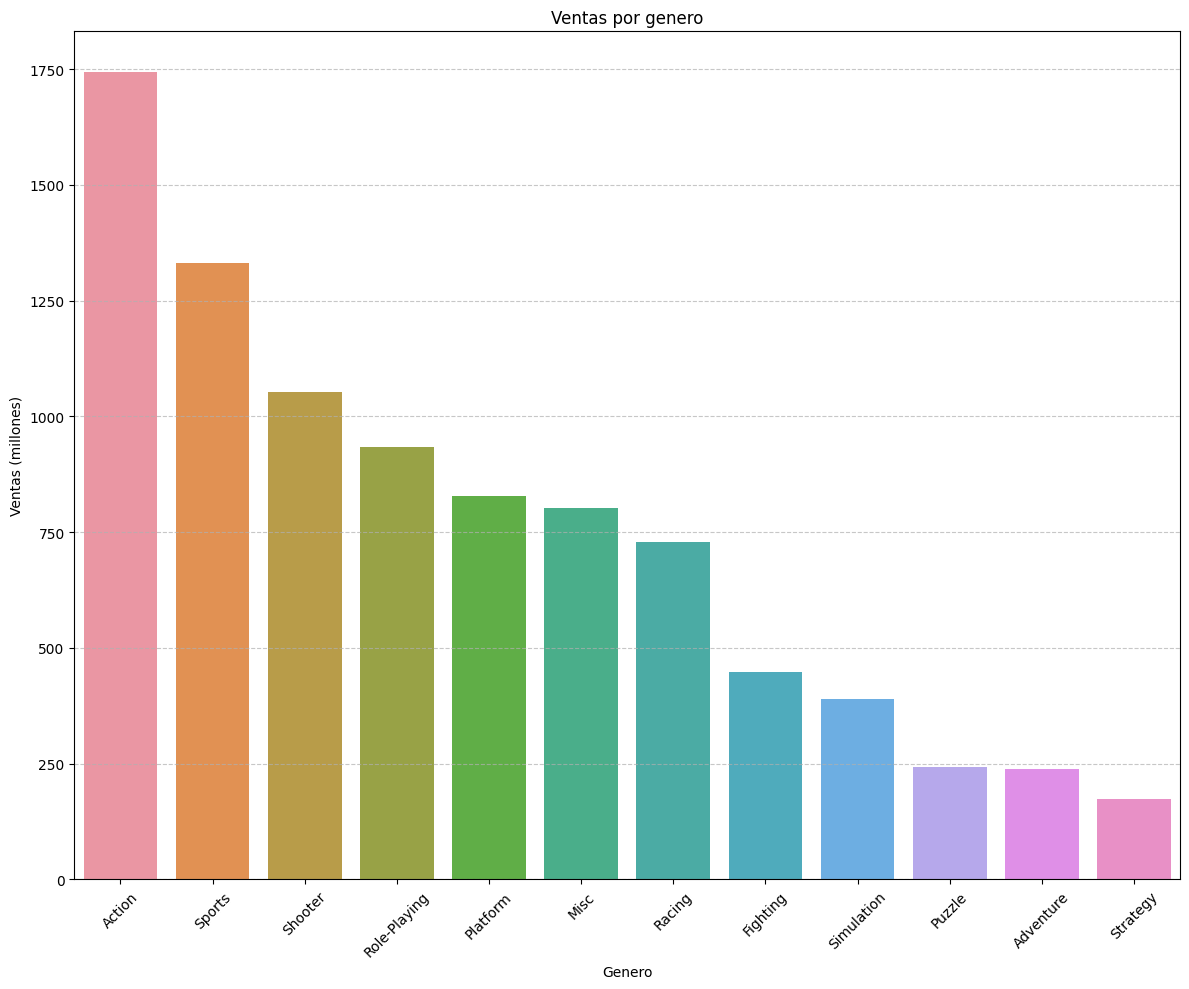

In [48]:
plt.figure(figsize=(12, 10))
sns.barplot(data=df_genre_comb.sort_values(by="total_sales", ascending=False), x="genre", y="total_sales")

plt.title("Ventas por genero")
plt.xlabel("Genero")
plt.ylabel("Ventas (millones)")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


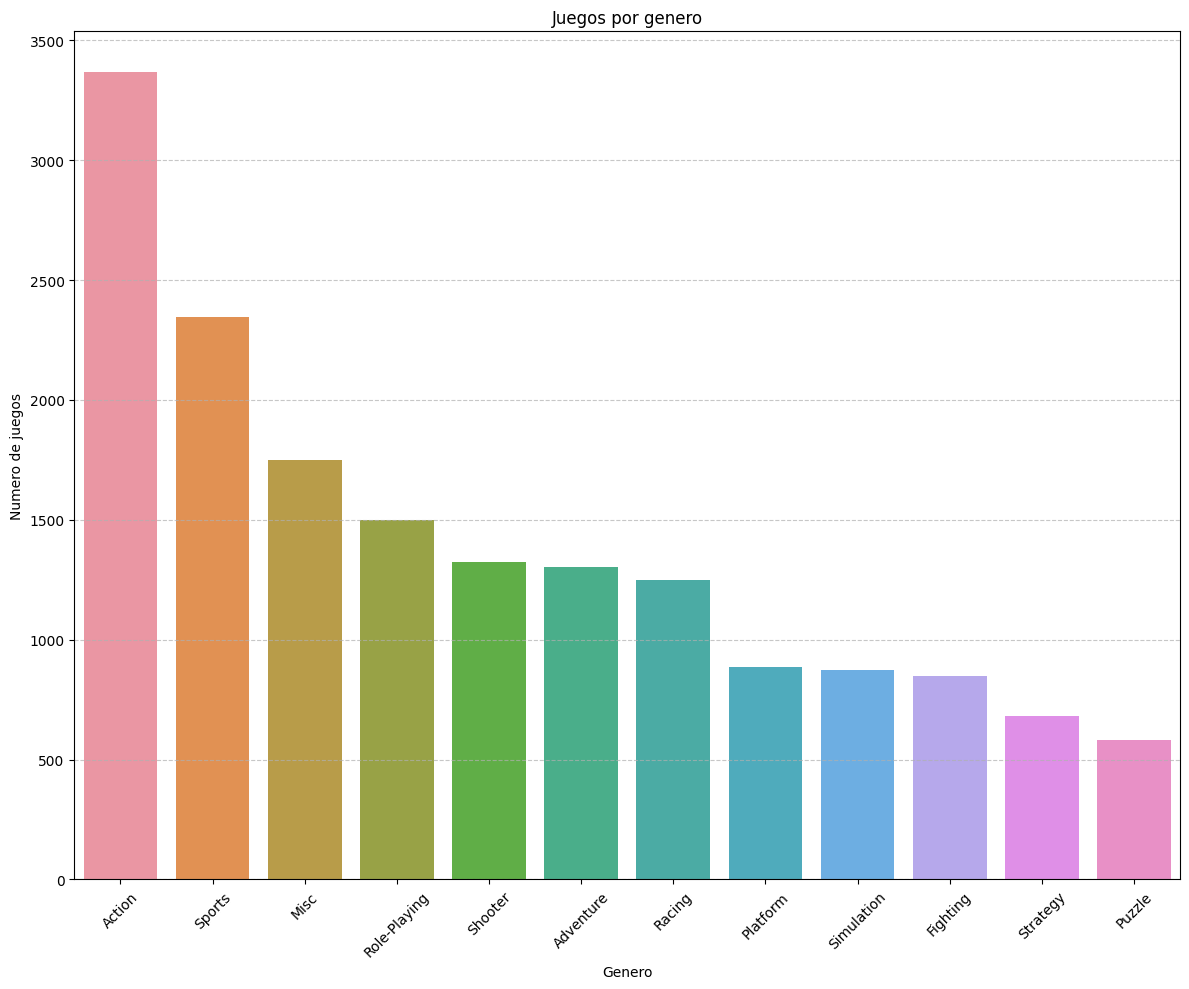

In [49]:
plt.figure(figsize=(12, 10))
sns.barplot(data=df_genre_comb.sort_values(by="games_number", ascending=False), x="genre", y="games_number")
plt.title("Juegos por genero")
plt.xlabel("Genero")
plt.ylabel("Numero de juegos")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Los generos de Accion y Deportes son los que mas juegos tienen y tambien los que mas ventas generan, que en ambos graficos se encuentren con los valores mas altos nos indica que son las categorias mas rentables y estables de todas.

Ahora veamos que sucede cuando comparamos entre regiones

In [50]:
na_platforms = df_games.groupby("platform")["na_sales"].sum().sort_values(ascending=False).head(5)
eu_platforms = df_games.groupby("platform")["eu_sales"].sum().sort_values(ascending=False).head(5)
jp_platforms = df_games.groupby("platform")["jp_sales"].sum().sort_values(ascending=False).head(5)

print("Top 5 plataformas en NA:")
print(na_platforms)
print("Top 5 plataformas en EU:")
print(eu_platforms)
print("Top 5 plataformas en JP:")
print(jp_platforms)

Top 5 plataformas en NA:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64
Top 5 plataformas en EU:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64
Top 5 plataformas en JP:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


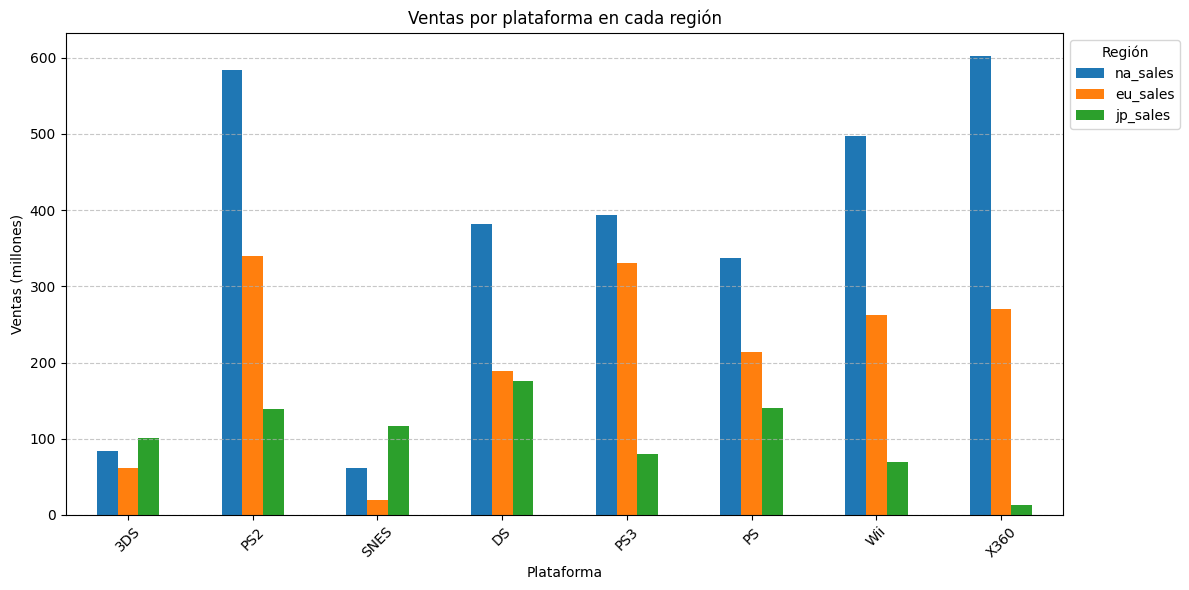

In [51]:
top_platforms = set(na_platforms.index) | set(eu_platforms.index) | set(jp_platforms.index)
region_sales = df_games.groupby("platform")[["na_sales", "eu_sales", "jp_sales"]].sum()
region_sales = region_sales.loc[top_platforms]

region_sales.plot(kind="bar", figsize=(12,6))
plt.title("Ventas por plataforma en cada región")
plt.ylabel("Ventas (millones)")
plt.xlabel("Plataforma")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Región", bbox_to_anchor=(1, 1), loc="upper left")
plt.tight_layout()
plt.show()

Es muy notoria la diferencia de ventas que existen entre regiones, la plataforma mas vendida en japon, es la mitad de la plataforma menos vendida en norteamerica, y en este caso ambos son la DS

Mientras que las plataformas mas populares en europa y norteamerica practicamente las mismas, solo variando en el nivel de ventas de una misma plataforma entre una region y otra, las plataformas preferidas en japon son totalmente diferentes, mientras en europa y norteamerica son consolas de sobremesa las mas compradas, en japon la mas comprada es una consola portatil, por lo que si en un futuro se lanza una nueva consola portatil, es buena idea distribuirla y distribuir juegos de esta en la region de japon

La region que mas compras tiene es norteamerica, mientras que la que menos ventas representa es la de japon


Veamos que sucede ahora con los generos

In [52]:
na_genres = df_games.groupby("genre")["na_sales"].sum().sort_values(ascending=False).head(5)
eu_genres = df_games.groupby("genre")["eu_sales"].sum().sort_values(ascending=False).head(5)
jp_genres = df_games.groupby("genre")["jp_sales"].sum().sort_values(ascending=False).head(5)

print("Top 5 géneros en NA:", na_genres)
print("Top 5 géneros en EU:", eu_genres)
print("Top 5 géneros en JP:", jp_genres)

Top 5 géneros en NA: genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64
Top 5 géneros en EU: genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64
Top 5 géneros en JP: genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


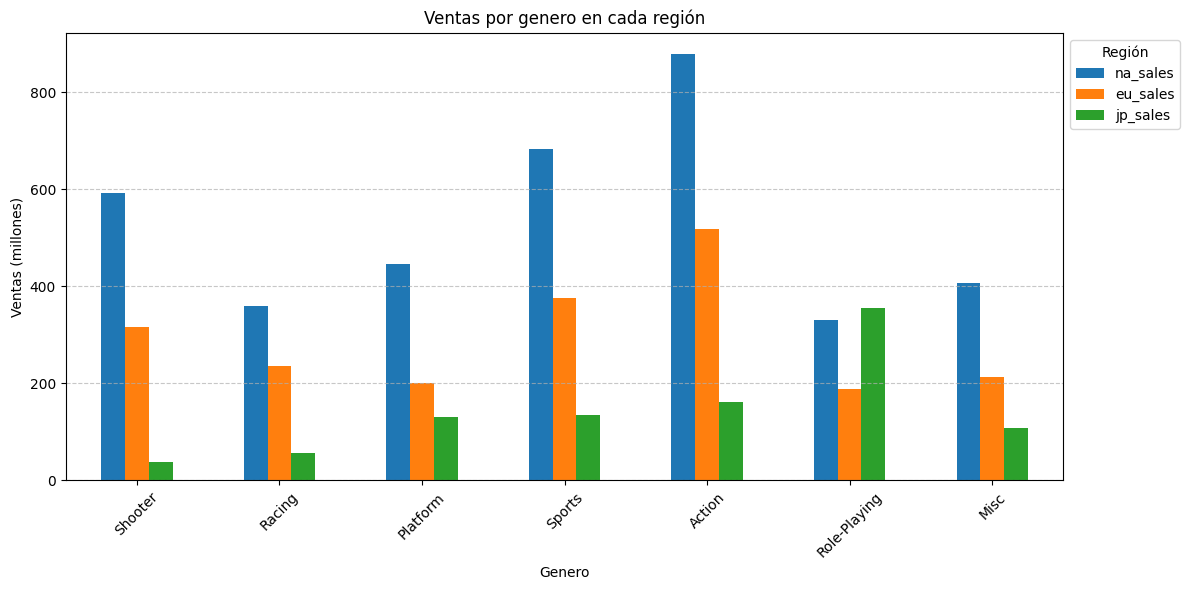

In [53]:
top_genres = set(na_genres.index) | set(eu_genres.index) | set(jp_genres.index)
regional_genres = df_games.groupby("genre")[["na_sales", "eu_sales", "jp_sales"]].sum()
regional_genres = regional_genres.loc[top_genres]

regional_genres.plot(kind="bar", figsize=(12,6))
plt.title("Ventas por genero en cada región")
plt.ylabel("Ventas (millones)")
plt.xlabel("Genero")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Región", bbox_to_anchor=(1, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [54]:
esrb_region_sales = df_games.groupby("rating")[["na_sales", "eu_sales", "jp_sales"]].sum()
esrb_region_sales

,na_sales,eu_sales,jp_sales
rating,,,
AO,1.26,0.61,0.00
E,1292.99,710.25,198.11
E10+,353.32,188.52,40.20
EC,1.53,0.11,0.00
K-A,2.56,0.27,1.46
M,748.48,483.97,64.24
RP,1240.68,613.38,841.93
T,759.75,427.03,151.40


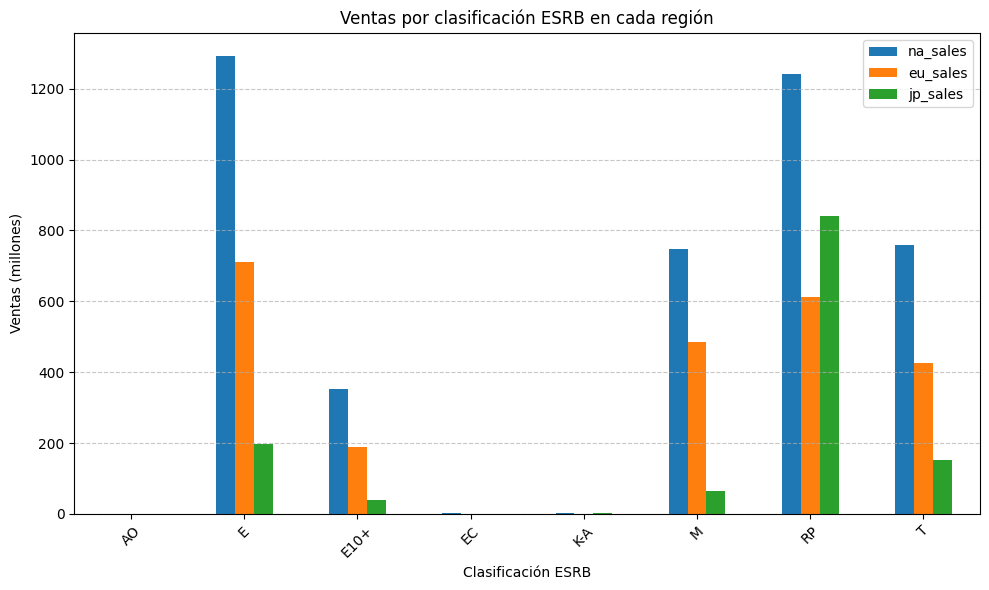

In [55]:
esrb_region_sales.plot(kind="bar", figsize=(10, 6))
plt.title("Ventas por clasificación ESRB en cada región")
plt.ylabel("Ventas (millones)")
plt.xlabel("Clasificación ESRB")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Los juegos para adultos (AO), para bebes y niños pequeños (EC / K-A) son los menos buscados por el consumidor, puede ser debido a que los juegos solamente para adultos no son adecuados ni bien vistos, y los bebes y niños pequeños no son el principal sector de la poblacion a la que va dirigida la produccion de consolas y videojuegos, mientas que los juegos para todo publico y adolescentes parecen estar mejor posicionados, y el rating ganador es el RP, ya que en esta categoria es donde caen mas ventas, puede estar relacionado con la calificacion de usuaro de dichos juegos, como ya lo explicamos, el usuario se deja llevar principalmente por comentarios de otros usuarios. y por ultimo estados unidos consume un mayor numero de juegos rating M, a comparacion de japon que consume lo minimo, indicando una gran diferencia en las culturas de ambas regiones y los gustos para los productos que consumen

PRUEBAS DE HIPOTESIS

Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [56]:
xbox_one_scores = df_games[df_games["platform"] == "XOne"]["user_score"]
pc_scores = df_games[df_games["platform"] == "PC"]["user_score"]

xbox_one_scores = pd.to_numeric(xbox_one_scores, errors="coerce").dropna()
pc_scores = pd.to_numeric(pc_scores, errors="coerce").dropna()

xbox_mean =xbox_one_scores.mean()
pc_mean=pc_scores.mean()

print("La media de calificaciones de Xbox One es:",xbox_mean)
print("La media de calificaciones de PC es:",pc_mean)

alpha = 0.05
result = ttest_ind(xbox_one_scores, pc_scores)

print(result.pvalue)
if(result.pvalue < alpha): 
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en las calificaciones.")
else:
    print("No se rechaza la hipótesis nula: no hay una diferencia significativa en las calificaciones.")

La media de calificaciones de Xbox One es: 6.521428571428572
La media de calificaciones de PC es: 7.062467532467533
1.3896435533548819e-05
Rechazamos la hipótesis nula: hay una diferencia significativa en las calificaciones.


Al rechazarse la hipotesis nula podemos decir que no hay evidencia suficiente para afirmar que las calificaciones son distintas, por lo tanto podemos asumir que son estadisticamente iguales

Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [57]:
action_scores = df_games[df_games["genre"] == "Action"]["user_score"]
sports_scores = df_games[df_games["genre"] == "Sports"]["user_score"]

action_scores = pd.to_numeric(action_scores, errors="coerce").dropna()
sports_scores = pd.to_numeric(sports_scores, errors="coerce").dropna()

action_mean = action_scores.mean()
sports_mean = sports_scores.mean()

print("La media de calificaciones del genero action es:",action_mean)
print("La media de calificaciones del genero sports:",sports_mean)

alpha = 0.05
result = ttest_ind(action_scores, sports_scores)

print(result.pvalue)
if(result.pvalue < alpha): 
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en las calificaciones.")
else:
    print("No se rechaza la hipótesis nula: no hay una diferencia significativa en las calificaciones")

La media de calificaciones del genero action es: 7.054043715846995
La media de calificaciones del genero sports: 6.961196736174069
0.10406951359049141
No se rechaza la hipótesis nula: no hay una diferencia significativa en las calificaciones


Se determina el valor de alpha como 0.05 ya que es lo convencional, y estamos dispuestos a tener ese 5% de margen para determinar el resultado, ademas de que se elige una prueba ttest para una hipotesis de 2 colas ya que estamos comparando la media de 2 poblaciones distintas, no es suficiente con comparar de manera directa la media de ambas poblaciones ya que lo que necesitamos saber es que tan significativa es la diferencia entre uno y otro, mi hipotesis nula es directamente que mis medias sean iguales y mi hipotesis alternativa es que las medias sean distintas, por lo tanto no indicamos dentro de los argumentos la diferencia de medias, ya que estamos dando por hecho que seran similares

CONCLUSIONES GENERALES

Las plataformas portatiles son las preferidas en la region de japon, mientras que las plataformas de sobremesa son las preferidas en las regiones de norteamerica y de europa, ademas los generos mas populares son el de accion y deportes, por lo que las empresas desarrolladoras deberan buscar distribuir mundialmente los juegos de estos generos ya que seran bien recibidos y consumidos en cualquier parte del mundo, asi mismo debe considerarse para que plataformas sera lanzado el juego, ya que mientras mas plataformas tengan acceso a este juego, mayor sera su numero de ventas como lo vimos con grand theft auto v, que aunque no es el mejor dentro de cada consola por separado, una vez que se unifican las estadisticas de venta generales el resultado es muy positivo.

Hay que ser cautelosos en la liberacion de nuevas plataformas que sean sucesoras de una ya existente, tenemos de ejemplo lo sucedido con PS4, XOne y 3DS que al momento de entrar en vigencia y comenzar su vida util y distribucion, pueden generar la caida abrupta de las antecesoras que en este caso fueron PS3, X360 y Wii.

Es importante considerar que el hecho de que las ventas disminuyan de manera significativa en consolas de años pasados, no es un alto total a las ventas, asi que tambien debemos considerar seguir alimentando un periodo considerable de tiempo a las plataformas anteriores, ya que no todos los usuarios tendran capacidad de renovar su consola conforme el mercado las libera.

El 2017 es un año que pinta bien para la PS4, XOne y 3DS ya que son las consolas con mayor numero de ventas hasta el 2016 y sin un contrincante directo ni un lanzamiento de sucesores pronto, aun tendran un numero de ventas elevado.

Es importante identificar las caracteristicas principales de los best sellers, todas las plataformas en general presentaron un nivel bajo/medio de ventas para la mayoria de sus juegos, pero juegos especificos que logran agradar al publico pueden elevar por si solos de manera importante las ventas para las plataformas, al conocer estas caracteristicas, la formula se vuelve replicable y es mas probable lanzar juegos con estas caracteristicas de ventas. (Pokemon, Mario Kart, Grand Theft Auto... etc), esto tambein significa que un numero mayor de lanzamientos no es garantia para un nivel elevado de ventas.

Mantener lanzamientos de juegos para consolas que ya tienen tiempo en mercado ayuda a mantenerlas vigentes y a seguir vendiendo juegos a personas que no tienen la capacidad de actualizar su consola o que simplemente no quieren hacerlo porque estan agusto con la que tienen, por lo tanto en medida de lo posible y considerando el avance de las tecnologias, se recomienda seguir dando soporte a consolas viejas.